# Line Chat Bot Record Expenses
##### Mr.Jakkrit Sonsanit

***

### Import Library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from firebase import firebase

### Create New DataFrame

In [4]:
# dfe = pd.DataFrame({
#     'date':[],
#     'text':[],
#     'money':[],
#     'cate':[]
# })

## EXPENSES
***

### Load Dataframe

In [5]:
dfe = pd.read_csv('Expenses.csv')
dfe.tail()

,date,text,money,cate
250,2019-11-20,น้ำ,15.0,Food
251,2019-11-20,ช็อกโกแลต,12.0,Food
252,2019-11-20,ข้าวเย็น,100.0,Food
253,2019-11-20,ซื้อแชมพู,159.0,Shopping
254,2019-11-20,ซื้อครีมนวด,159.0,Shopping


### Connect Firebase

In [6]:
authentication = firebase.FirebaseAuthentication('wI4pPnsc1m2Ei7E3Q3drORPWtDBo927IxwBsA6ZH', 'palm8ikaa2@gmail.com', extra={'id': 123})
firebase = firebase.FirebaseApplication('https://line-bot-chrins.firebaseio.com/', authentication=authentication)

### Query Expenses from firebase

In [7]:
result = firebase.get('/expenses', None)

### Append new expenses in dataframe

In [8]:
tmp = list()
old_numlist = len(dfe)
for k, v in result.items():
    tmp.append(v)
for i in range(len(tmp)):
    if i >= old_numlist:
        dfe = dfe.append(tmp[i], ignore_index=True)
dfe.date = pd.to_datetime(dfe.date)
dfe.tail()

,date,text,money,cate
257,2019-11-21,กระเจี๊ยบ,5.0,NaN
258,2019-11-21,นม,10.0,NaN
259,2019-11-21,ข้าวเย็น,45.0,NaN
260,2019-11-21,ขนม,20.0,NaN
261,2019-11-21,ชานม,45.0,NaN


### Append expenses on day in dataframe

In [9]:
# for k, v in result.items():
#     if v['date'] == '6/9/2019':
#         dfe = dfe.append(v, ignore_index=True)
# dfe.date = pd.to_datetime(dfe.date)
# dfe.head()

### Append all expenses to dataframe

In [10]:
# for k, v in result.items():
#     dfe = dfe.append(v, ignore_index=True)
# dfe.date = pd.to_datetime(dfe.date)
# dfe.head()

### Set NaN Category is Food

In [11]:
dfe.cate = dfe.cate.fillna('Food')
dfe.tail(15)

,date,text,money,cate
247,2019-11-20,นม,10.0,Food
248,2019-11-20,ข้าวเที่ยง,25.0,Food
249,2019-11-20,กระเจี๊ยบ,5.0,Food
250,2019-11-20,น้ำ,15.0,Food
251,2019-11-20,ช็อกโกแลต,12.0,Food
252,2019-11-20,ข้าวเย็น,100.0,Food
253,2019-11-20,ซื้อแชมพู,159.0,Shopping
254,2019-11-20,ซื้อครีมนวด,159.0,Shopping
255,2019-11-21,ซักผ้า,20.0,Food
256,2019-11-21,ข้าวเที่ยง,25.0,Food


### Change category

In [12]:
t = ['Entertainment', 'Transportation', 'Shopping', 'Food', 'Bill', 'Other']
n = 253
dfe.at[n, 'cate'] = t[-4]
dfe.iloc[n:]

,date,text,money,cate
253,2019-11-20,ซื้อแชมพู,159.0,Shopping
254,2019-11-20,ซื้อครีมนวด,159.0,Shopping
255,2019-11-21,ซักผ้า,20.0,Food
256,2019-11-21,ข้าวเที่ยง,25.0,Food
257,2019-11-21,กระเจี๊ยบ,5.0,Food
258,2019-11-21,นม,10.0,Food
259,2019-11-21,ข้าวเย็น,45.0,Food
260,2019-11-21,ขนม,20.0,Food
261,2019-11-21,ชานม,45.0,Food


### Save to csv

In [13]:
dfe.to_csv('Expenses.csv', index=False)

## INCOME
***

### Create DataFrame

In [14]:
# dfi = pd.DataFrame({
#     'date':[],
#     'text':[],
#     'money':[],
# })

### Load DataFrame

In [15]:
dfi = pd.read_csv('income.csv')

### Query income from firebase

In [16]:
result = firebase.get('/income', None)

### Append new income 

In [17]:
tmp = list()
old_numlist = len(dfi)
for k, v in result.items():
    tmp.append(v)
for i in range(len(tmp)):
    if i >= old_numlist:
        dfi = dfi.append(tmp[i], ignore_index=True)
dfi.date = pd.to_datetime(dfi.date)
dfi.tail()

,date,text,money
0,2019-10-01,พ่อให้,14000.0
1,2019-10-17,ได้เงิน,625.0
2,2019-10-18,ได้เงิน,155.0
3,2019-10-31,พ่อให้,14000.0


### Save to csv

In [18]:
dfi.to_csv('income.csv', index=False)

## Summary 
***

### Balance

In [19]:
print("Balance : %.2f Bath" %(sum(dfi.money)-sum(dfe.money)))

Balance : 2079.23 Bath


### Set month

In [20]:
m = 11

dfim = dfi[dfi.date.dt.month == m]
dfem = dfe[dfe.date.dt.month == m]

### Total Incom and Expenses 

In [21]:
print("Total Income :", sum(dfim.money), 'Bath')
print("Total Expenses :", sum(dfem.money), 'Baht')

Total Income : 0 Bath
Total Expenses : 11610.0 Baht


### Total Expenses in day

In [22]:
d = "2019-"+str(m)+"-"+(input("Day :") or str(1))
print("Total Expenses in", d, ":", sum(dfem[dfem.date == d]['money']), 'Baht')
dfem[dfem.date == d]

Day : 21


Total Expenses in 2019-11-21 : 170.0 Baht


,date,text,money,cate
255,2019-11-21,ซักผ้า,20.0,Food
256,2019-11-21,ข้าวเที่ยง,25.0,Food
257,2019-11-21,กระเจี๊ยบ,5.0,Food
258,2019-11-21,นม,10.0,Food
259,2019-11-21,ข้าวเย็น,45.0,Food
260,2019-11-21,ขนม,20.0,Food
261,2019-11-21,ชานม,45.0,Food


### Total Expenses in each month 

In [23]:
tmp = dfe.rename(columns={"date": "Month", "money":"Money"})
tmp.groupby(tmp.Month.dt.month).sum()

,Money
Month,
10,15090.77
11,11610.00


### Total Expenses in each category

In [24]:
dfem.groupby(['cate']).sum()

,money
cate,
Bill,6709.0
Entertainment,609.0
Food,3420.0
Other,100.0
Shopping,442.0
Transportation,330.0


### Expenses in each category

In [25]:
ls = ['1.Food', '2.Entertainment', '3.Bill', '4.Saving', '5.Shopping', '6.Transportation', '7.Other']
print(*ls)
dfem[dfem.cate == ls[int(input('Enter number of category ') or 2)-1][2:]]

1.Food 2.Entertainment 3.Bill 4.Saving 5.Shopping 6.Transportation 7.Other


Enter number of category  


,date,text,money,cate
218,2019-11-12,เติมเกม,300.0,Entertainment
232,2019-11-16,เหล้า,99.0,Entertainment
234,2019-11-16,เหล้า,210.0,Entertainment


### Total in each day

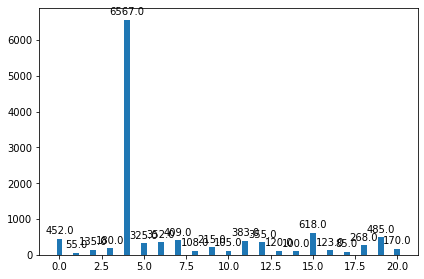

In [26]:
tmp = dfem.groupby(dfem.date.dt.day).sum()

x = np.arange(len(tmp))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x, tmp['money'], width)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
        
fig.tight_layout()
plt.show()

### Expenses ratio in each category

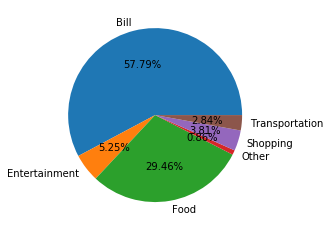

In [27]:
tmp = dfem.groupby(['cate']).sum()
tmp = tmp.reset_index()
plt.pie(tmp.money, labels=tmp.cate, autopct=lambda x: '{:.2f}%'.format(x));

### Total expenses in each month

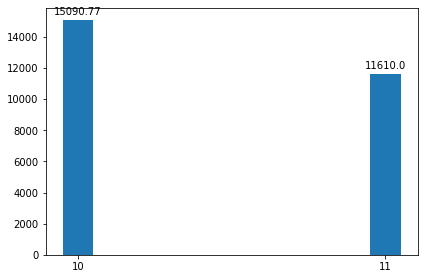

In [28]:
tmp = dfe.groupby(dfe.date.dt.month).sum()
tmp = tmp.reset_index()
tmp.date = tmp.date.astype(str)

x = tmp.date
width = .1 # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x, tmp['money'], width)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
        
fig.tight_layout()
plt.show()